In [46]:
!pip install sqlalchemy==1.3.9

  Using cached sqlalchemy-1.3.9-cp313-cp313-win_amd64.whl
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.46
    Uninstalling SQLAlchemy-2.0.46:
      Successfully uninstalled SQLAlchemy-2.0.46


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.3.9 which is incompatible.


In [47]:
!pip install ipython-sql
!pip install ipython-sql prettytable

  Using cached sqlalchemy-2.0.46-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
Using cached sqlalchemy-2.0.46-cp313-cp313-win_amd64.whl (2.1 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [48]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [49]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [50]:
%sql sqlite:///my_data1.db

In [51]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [52]:
#DROP THE TABLE IF EXISTS

pd.read_sql_query('PRAGMA table_info(SPACEXTABLE);', con)

,cid,name,type,notnull,dflt_value,pk
0,0,Date,TEXT,0,None,0
1,1,Time (UTC),TEXT,0,None,0
2,2,Booster_Version,TEXT,0,None,0
3,3,Launch_Site,TEXT,0,None,0
4,4,Payload,TEXT,0,None,0
5,5,PAYLOAD_MASS__KG_,INT,0,None,0
6,6,Orbit,TEXT,0,None,0
7,7,Customer,TEXT,0,None,0
8,8,Mission_Outcome,TEXT,0,None,0
9,9,Landing_Outcome,TEXT,0,None,0


In [54]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
(sqlite3.OperationalError) table SPACEXTABLE already exists
[SQL: create table SPACEXTABLE as select * from SPACEXTBL where Date is not null]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [55]:
query = 'SELECT DISTINCT "Launch_Site" FROM SPACEXTABLE ORDER BY "Launch_Site";'
unique_launch_sites = pd.read_sql_query(query, con)
unique_launch_sites

,Launch_Site
0,CCAFS LC-40
1,CCAFS SLC-40
2,KSC LC-39A
3,VAFB SLC-4E


In [56]:
query = """
SELECT *
FROM SPACEXTABLE
WHERE "Launch_Site" LIKE 'CCA%'
LIMIT 5;
"""
pd.read_sql_query(query, con)

,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [57]:
query = """
SELECT SUM("Payload_Mass__kg_") AS total_payload_mass_kg
FROM SPACEXTABLE
WHERE "Customer" = 'NASA (CRS)';
"""
pd.read_sql_query(query, con)

,total_payload_mass_kg
0,45596


In [58]:
query = """
SELECT AVG("Payload_Mass__kg_") AS avg_payload_mass_kg
FROM SPACEXTABLE
WHERE "Booster_Version" = 'F9 v1.1';
"""
pd.read_sql_query(query, con)

,avg_payload_mass_kg
0,2928.4


In [59]:
query = """
SELECT MIN("Date") AS first_success_ground_pad_date
FROM SPACEXTABLE
WHERE "Landing_Outcome" = 'Success (ground pad)';
"""
pd.read_sql_query(query, con)

,first_success_ground_pad_date
0,2015-12-22


In [60]:
query = """
SELECT DISTINCT "Booster_Version"
FROM SPACEXTABLE
WHERE "Landing_Outcome" = 'Success (drone ship)'
  AND "Payload_Mass__kg_" > 4000
  AND "Payload_Mass__kg_" < 6000
ORDER BY "Booster_Version";
"""
pd.read_sql_query(query, con)

,Booster_Version
0,F9 FT B1021.2
1,F9 FT B1031.2
2,F9 FT B1022
3,F9 FT B1026


In [61]:
query = """
SELECT "Mission_Outcome", COUNT(*) AS total
FROM SPACEXTABLE
GROUP BY "Mission_Outcome";
"""
pd.read_sql_query(query, con)

,Mission_Outcome,total
0,Failure (in flight),1
1,Success,98
2,Success,1
3,Success (payload status unclear),1


In [62]:
query = """
SELECT DISTINCT "Booster_Version"
FROM SPACEXTABLE
WHERE "Payload_Mass__kg_" = (
    SELECT MAX("Payload_Mass__kg_")
    FROM SPACEXTABLE
);
"""
pd.read_sql_query(query, con)

,Booster_Version
0,F9 B5 B1048.4
1,F9 B5 B1049.4
2,F9 B5 B1051.3
3,F9 B5 B1056.4
4,F9 B5 B1048.5
5,F9 B5 B1051.4
6,F9 B5 B1049.5
7,F9 B5 B1060.2
8,F9 B5 B1058.3
9,F9 B5 B1051.6


In [63]:
query = """
SELECT
  substr("Date", 6, 2) AS "Month",
  "Landing_Outcome",
  "Booster_Version",
  "Launch_Site"
FROM SPACEXTABLE
WHERE substr("Date", 0, 5) = '2015'
  AND "Landing_Outcome" LIKE '%Failure (drone ship)%'
ORDER BY "Month", "Date";
"""
pd.read_sql_query(query, con)

,Month,Landing_Outcome,Booster_Version,Launch_Site
0,01,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
1,04,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


In [65]:
query = """
SELECT 
    "Landing_Outcome" AS landing_outcome,
    COUNT(*) AS outcome_count
FROM SPACEXTABLE
WHERE Date BETWEEN '2010-06-04' AND '2017-03-20'
GROUP BY "Landing_Outcome"
ORDER BY outcome_count DESC;
"""
pd.read_sql_query(query, con)

,landing_outcome,outcome_count
0,No attempt,10
1,Success (drone ship),5
2,Failure (drone ship),5
3,Success (ground pad),3
4,Controlled (ocean),3
5,Uncontrolled (ocean),2
6,Failure (parachute),2
7,Precluded (drone ship),1


### Exploring and Preparing Data

In [28]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [29]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


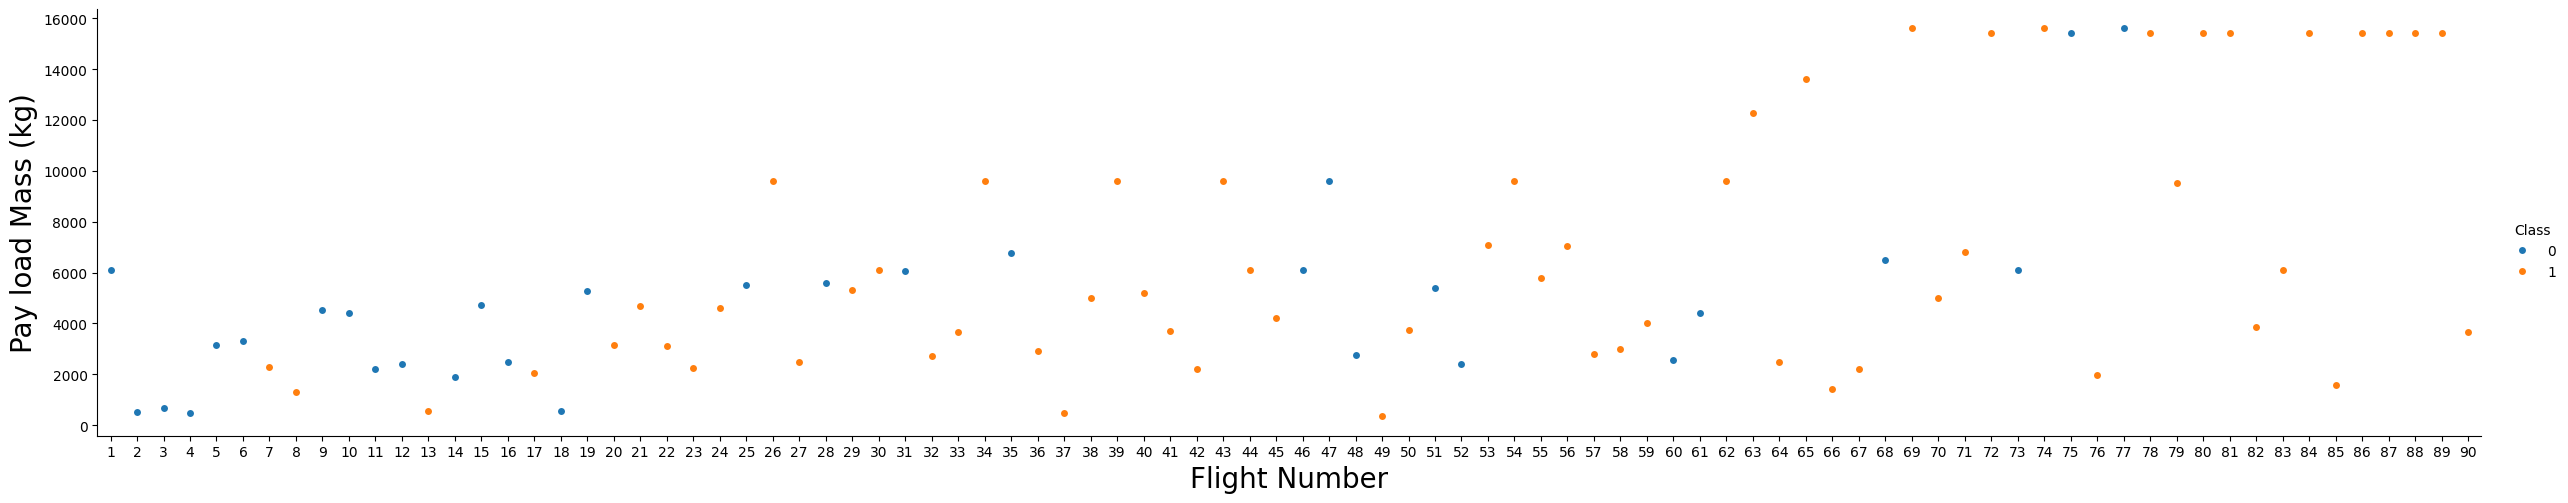

In [30]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

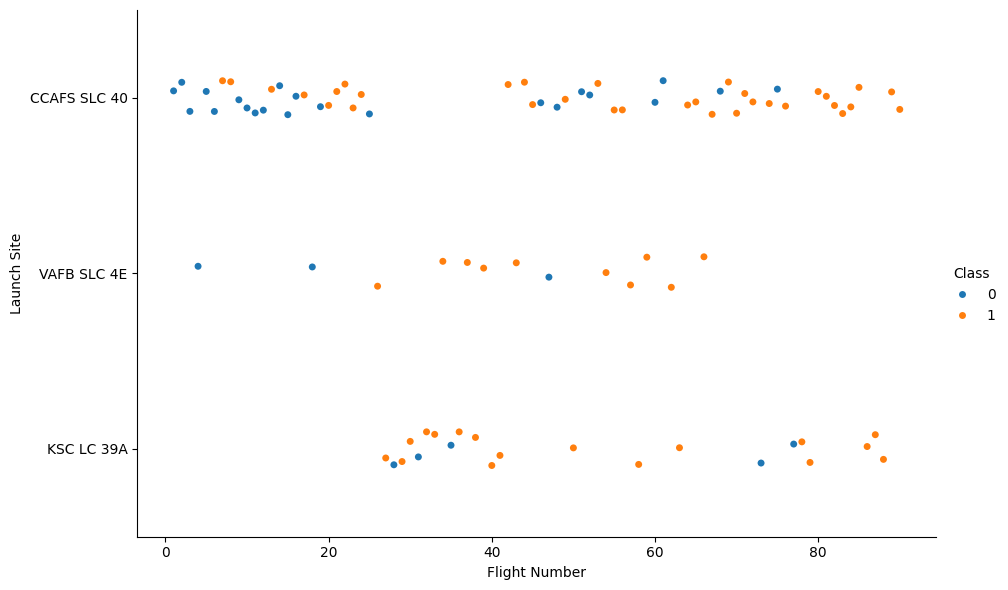

In [32]:
sns.catplot(
    data=df,
    x="FlightNumber",
    y="LaunchSite",
    hue="Class",
    kind="strip",
    height=6,
    aspect=1.6
)

plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.show()

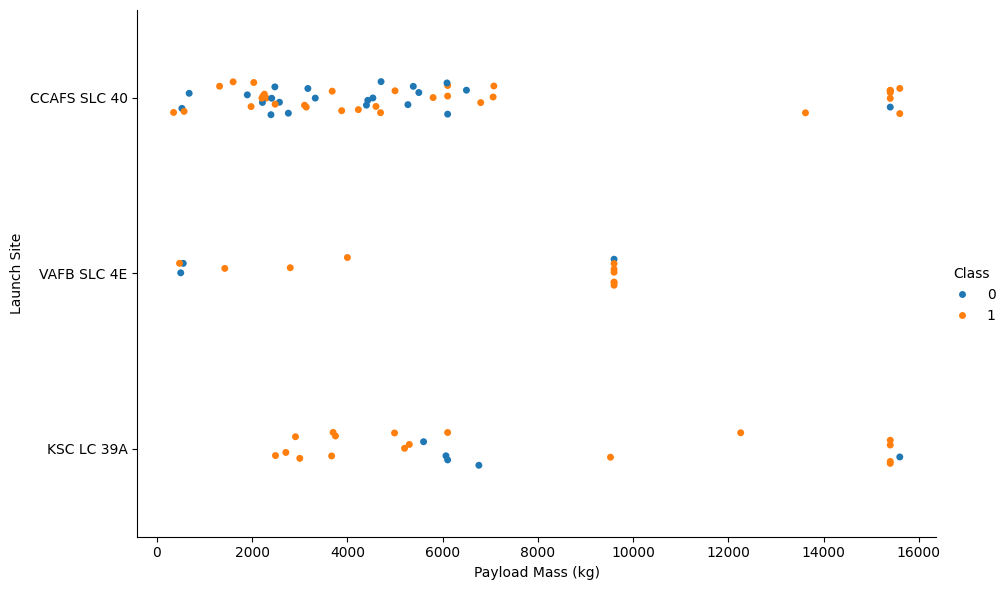

In [33]:
sns.catplot(
    data=df,
    x="PayloadMass",
    y="LaunchSite",
    hue="Class",
    kind="strip",
    height=6,
    aspect=1.6
)

plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site")
plt.show()

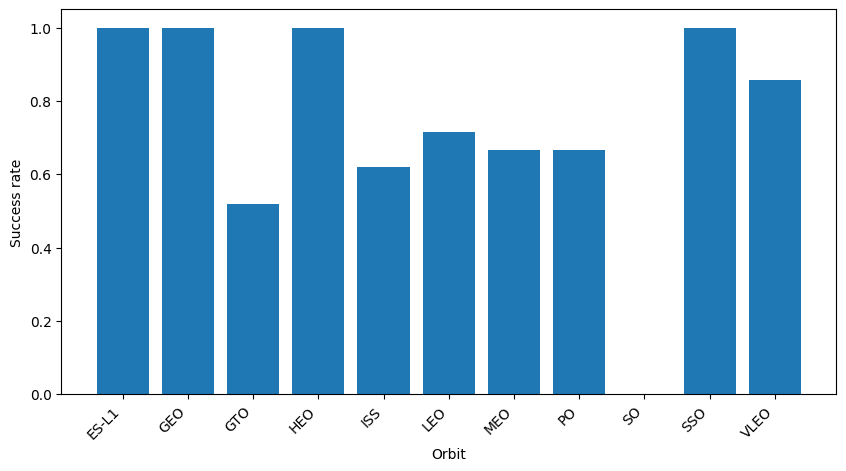

In [34]:
orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.bar(orbit_success['Orbit'], orbit_success['Class'])
plt.xlabel('Orbit')
plt.ylabel('Success rate')
plt.xticks(rotation=45, ha='right')
plt.show()

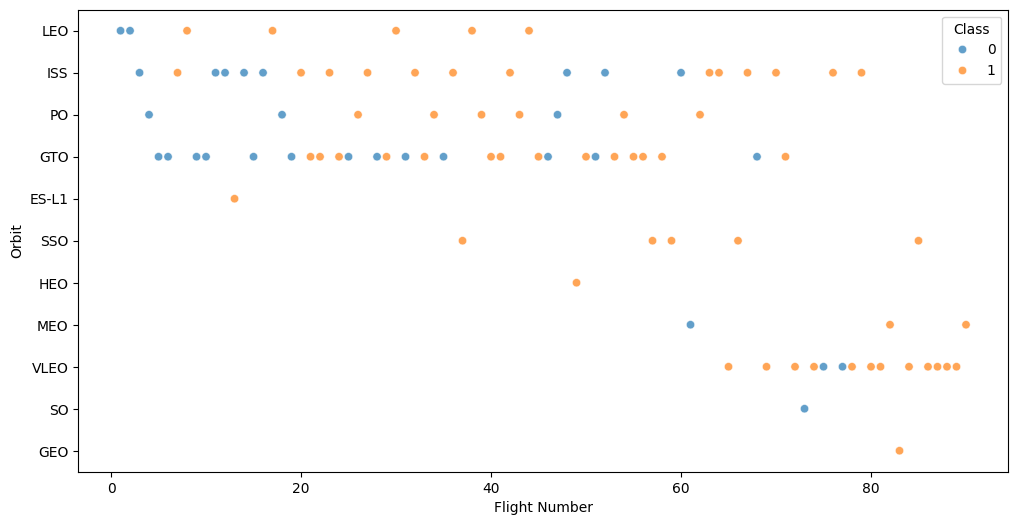

In [35]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    alpha=0.7
)
plt.xlabel("Flight Number")
plt.ylabel("Orbit")
plt.legend(title="Class")
plt.show()

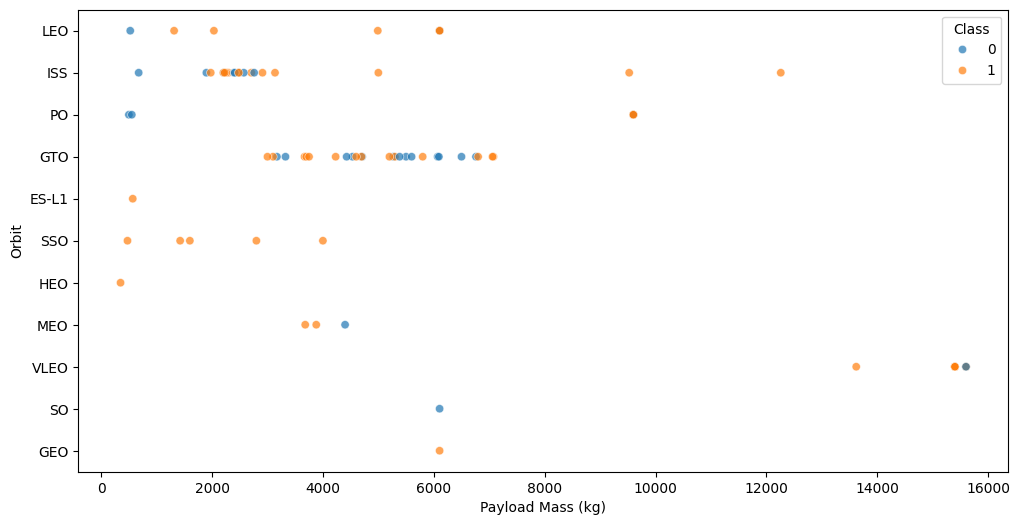

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x="PayloadMass",
    y="Orbit",
    hue="Class",
    alpha=0.7
)
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit")
plt.legend(title="Class")
plt.show()

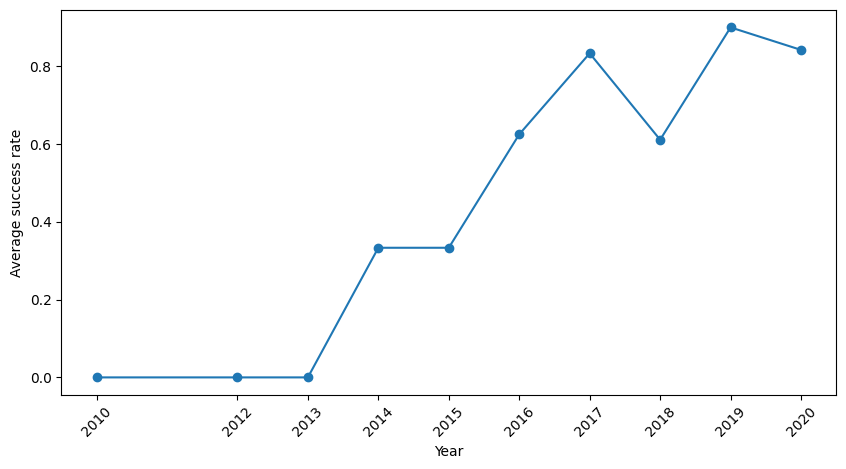

In [38]:
# Crear Year desde Date (sin pisar Date)
df['Year'] = df['Date'].astype(str).str.split('-').str[0].astype(int)

# Promedio de éxito por año
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

# Line chart
plt.figure(figsize=(10,5))
plt.plot(yearly_success['Year'], yearly_success['Class'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average success rate')
plt.xticks(yearly_success['Year'], rotation=45)
plt.show()

In [39]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [40]:
features_one_hot = pd.get_dummies(
    features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
)

features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)